# Uber Supply-Demand Gap Analysis

**Contribution**: Individual  
**Team Member(s)**: Himanshu  
**Project Type**: EDA  


### Project Summary

This EDA project aims to uncover insights from Uber ride request data to identify key supply-demand issues. By analyzing ride status, request times, and pickup locations, we aim to understand when and where cancellations or unavailability are most common.

The insights will help recommend strategies to reduce unfulfilled rides and improve driver allocation.


### Business Objective

To analyze Uber trip request data and provide actionable insights on:
- When most ride cancellations or no-availability occurs
- Which pickup points face more demand pressure
- How trip completion varies by time and location

Final goal: Reduce unfulfilled requests and improve efficiency.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


In [3]:
# Upload the CSV in the left panel (Files) first
df = pd.read_csv("Uber Request Data Cleaned.csv")
df.head()


,Request Id,Pickup Point,Driver Id,Status,Request Timestamp,Drop Timestamp,Request Hour,Trip Duration (min),Drived Assigned,Trip Completed,Request Date
0,619,Airport,1.0,Trip Completed,11-07-16 11:51,11-07-16 13:00,11,69.0,Yes,Yes,11-07-16
1,867,Airport,1.0,Trip Completed,11-07-16 17:57,11-07-16 18:47,17,50.0,Yes,Yes,11-07-16
2,1807,City,1.0,Trip Completed,12-07-16 9:17,12-07-16 9:58,9,41.0,Yes,Yes,12-07-16
3,2532,Airport,1.0,Trip Completed,12-07-16 21:08,12-07-16 22:03,21,55.0,Yes,Yes,12-07-16
4,3112,City,1.0,Trip Completed,13-07-16 8:33,13-07-16 9:25,8,53.0,Yes,Yes,13-07-16


In [4]:
df['Request Timestamp'] = pd.to_datetime(df['Request Timestamp'], errors='coerce')
df['Drop Timestamp'] = pd.to_datetime(df['Drop Timestamp'], errors='coerce')

df['Hour'] = df['Request Timestamp'].dt.hour
df['Day'] = df['Request Timestamp'].dt.day
df['Day Name'] = df['Request Timestamp'].dt.day_name()
df['Trip Completed'] = df['Drop Timestamp'].notna()


/tmp/ipython-input-4-3659758621.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Request Timestamp'] = pd.to_datetime(df['Request Timestamp'], errors='coerce')
/tmp/ipython-input-4-3659758621.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Drop Timestamp'] = pd.to_datetime(df['Drop Timestamp'], errors='coerce')


### Chart 1: Trip Status Distribution

**Why this chart?**  
To understand how many requests were completed vs cancelled or had no cars available.

**Business Impact:**  
Helps understand the scale of unfulfilled demand.


/tmp/ipython-input-5-3767604285.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=df, palette='Set2')


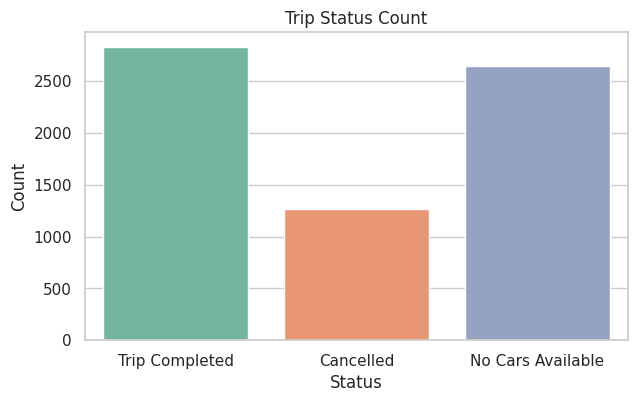

In [5]:
plt.figure(figsize=(7,4))
sns.countplot(x='Status', data=df, palette='Set2')
plt.title('Trip Status Count')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


### Chart 2: Requests by Hour

**Why this chart?**  
To identify when most ride requests happen.

**Business Impact:**  
Helps allocate more drivers during high-demand hours.


/tmp/ipython-input-6-2970545235.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='coolwarm')


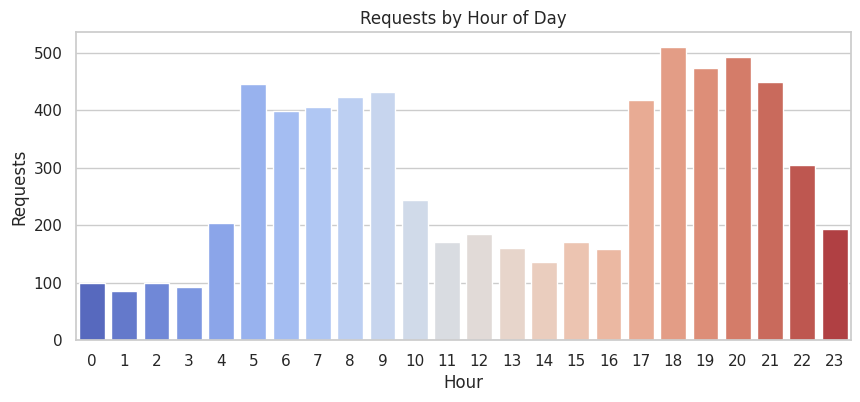

In [6]:
plt.figure(figsize=(10,4))
sns.countplot(x='Hour', data=df, palette='coolwarm')
plt.title('Requests by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Requests')
plt.show()


### Chart 3: Pickup Point vs Status

**Why this chart?**  
To identify which pickup point faces more cancellations or no-car-available issues.

**Business Impact:**  
Helps direct more drivers to areas with poor service.


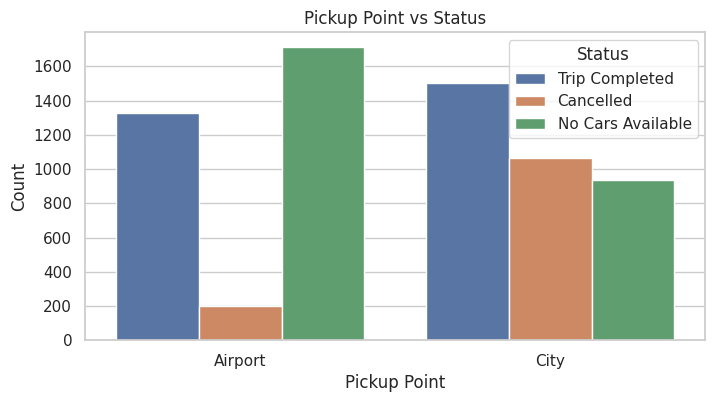

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x='Pickup Point', hue='Status', data=df)
plt.title('Pickup Point vs Status')
plt.xlabel('Pickup Point')
plt.ylabel('Count')
plt.show()


### Chart 4: Hourly Trip Status Distribution

**Why this chart?**  
To explore how trip status varies throughout the day.

**Business Impact:**  
Helps identify specific hours when cancellations or unavailability peak — so Uber can target those hours for supply planning.


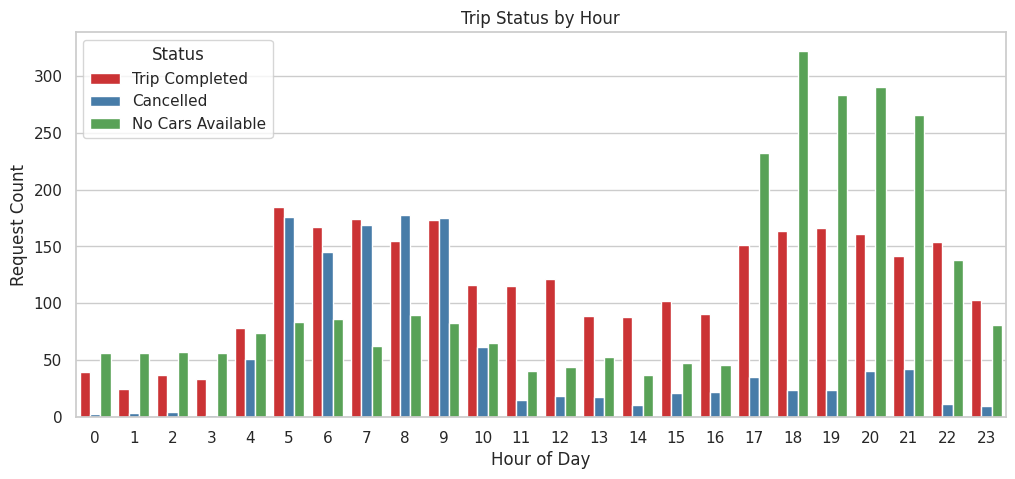

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(x='Hour', hue='Status', data=df, palette='Set1')
plt.title('Trip Status by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Request Count')
plt.show()


### Chart 5: Trip Completion Rate

**Why this chart?**  
To visualize the ratio of completed vs uncompleted rides.

**Business Impact:**  
This shows Uber’s overall service success rate, which is a key metric in operations.


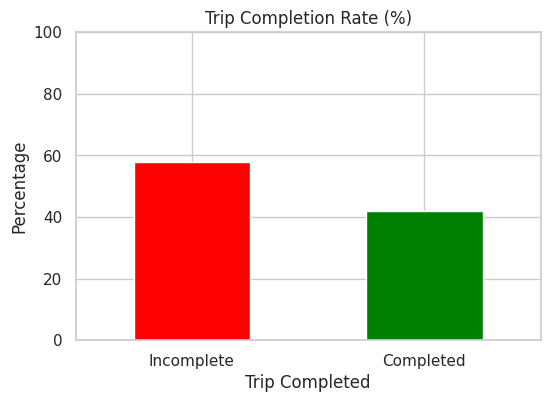

In [15]:
# Count values and convert to percentages
completion_rate = df['Trip Completed'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
completion_rate.plot(kind='bar', color=['red', 'green'])
plt.xticks(ticks=[0, 1], labels=['Incomplete', 'Completed'], rotation=0)
plt.title('Trip Completion Rate (%)')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to 0–100%
plt.show()


### Chart 6: No Cars Available Trend by Hour

**Why this chart?**  
To identify hours with the worst car availability.

**Business Impact:**  
Reveals the need for night shifts or more drivers during specific time slots.


/tmp/ipython-input-31-1345545465.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=no_car_df, palette='YlGnBu')


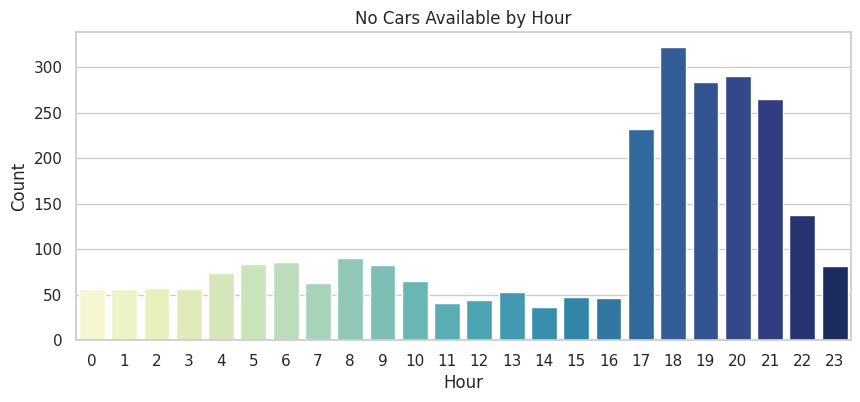

In [31]:
no_car_df = df[df['Status'] == 'No Cars Available']

plt.figure(figsize=(10,4))
sns.countplot(x='Hour', data=no_car_df, palette='YlGnBu')
plt.title('No Cars Available by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()


### Conclusion

Based on the exploratory data analysis of Uber ride request data, we can conclude the following:

- A significant number of rides were **not completed** (only 42% completion rate), primarily due to cancellations and no car availability.
- The **highest demand** for rides occurs during the **early morning (5 AM – 9 AM)** and **late night (9 PM – 1 AM)** time slots.
- **No cars available** is the dominant issue during **night hours**, especially for pickups from the **Airport**, indicating a supply shortage at that time.
- **Cancellations are more common in early morning and morning hours**, with most cancelled rides starting from the **Airport**.
- The **City pickup point** has more overall requests but **fewer cancellations**, showing more efficient service compared to the Airport.
- **Driver availability** is mismatched with actual demand patterns, leading to a supply-demand imbalance.



### Recommendations:

- **Incentivize drivers** to take trips from the Airport during early mornings and mornings.
- **Introduce night shifts** for drivers to address unavailability during late night slots.
- Use **real-time demand forecasting** to dynamically manage driver allocations.

These insights can help Uber improve customer experience by closing the supply-demand gap.